In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram
using LookupTable
using CSV
using DataFrames

In [8]:
@model RD_PNT begin
    @parameter begin
        kmph2mps = 0.27778
        I_wheelbase = 2.635
        vel_car_kmph = 60
    end
    df = CSV.read("../road_surface.csv", DataFrame)
    @xmlmodel("../METI_Vertical_Vibration.drawio", "RD_PNT")
    # @scope begin
    #     tab1.out => tab1
    #     tab2.out => tab2
    # end
end

RD_PNT (generic function with 1 method)

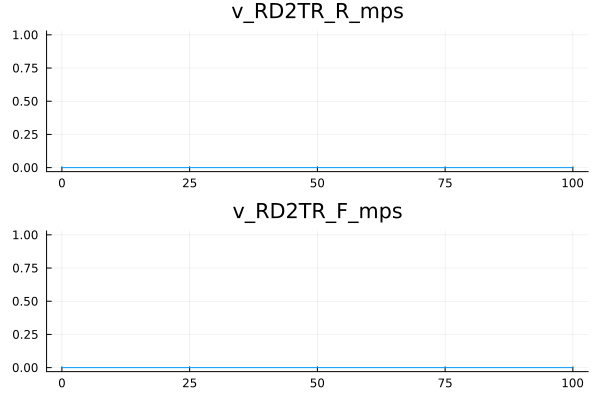

In [9]:
@model testblock begin
    @block begin
        m = RD_PNT()
    end
    @scope begin
        m.v_RD2TR_R_mps => v_RD2TR_R_mps
        m.v_RD2TR_F_mps => v_RD2TR_F_mps
    end
end

m = @compile_derivative testblock()
res = simulate(m, tspan=[0, 100])
plot(res)

In [10]:
res

JuliaMBD.SimulationResult((0.0001,), LinRange{Float64}(0.0, 100.0, 1000), (v_RD2TR_R_mps = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], v_RD2TR_F_mps = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Tuple{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Tuple{Float64}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Tuple{Float64}, Float64}}, FunctionWrappers.Fu

In [20]:
b = testblock()
a = JuliaMBD.tsort(JuliaMBD.allcomponents(b))
JuliaMBD.expr_ofunc_derivative(b, a)

quote
    function testblock_ofunc_derivative(var"##904", var"##916", var"##920"; time = 0)
        var"##935" = "ClipEx"
        var"##936" = "BinarySearch"
        begin
            var"##940" = var"##904"
            var"##945" = var"##904"
        end
        var"##902" = 0.27778
        var"##907" = (nothing, nothing)
        var"##926" = [0.002337802, 0.006929505, 0.002351349, 0.000465464, 0.000354075, 0.000887611, 0.000748058, 0.000328752, 0.000778706, 0.000730282  …  0.000752394, 0.000373936, 0.000611535, 0.000311205, 0.00075455, 8.1834e-5, 0.000253537, 0.000666529, 0.000874281, 0.000922936]
        begin
            var"##942" = var"##920"
        end
        begin
            var"##941" = var"##916"
        end
        var"##911" = var"##941"
        var"##918" = 0
        var"##928" = "ClipEx"
        var"##925" = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  3599.5, 3599.55, 3599.6, 3599.65, 3599.7, 3599.75, 3599.8, 3599.85, 3599.9, 3599.95]
        var"##897" 

In [18]:
testblock_sfunc_derivative(0,0,0,time=0)

(16.666800000000002, 0.002337802, 0.002337802)

In [19]:
m.sfunc()

#96 (generic function with 1 method)